In [2]:
import os
import numpy as np
from matplotlib import pyplot
import imageio

# Stage 1 using random intial grid configuration

How many rows of cells? 25
How many columns of cells? 25
How many iterations? 100


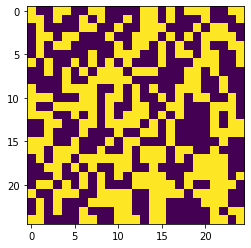

1


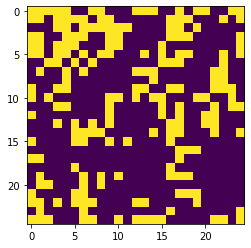

2


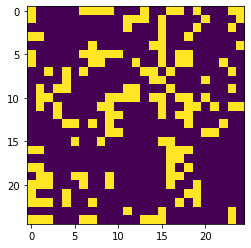

3


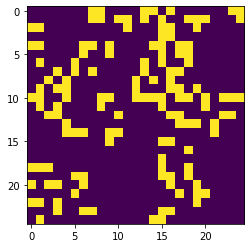

4


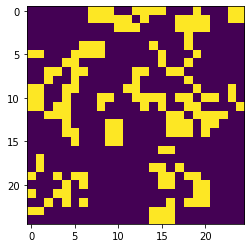

5


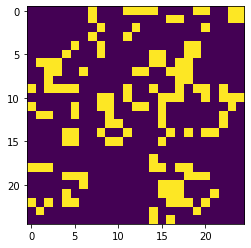

6


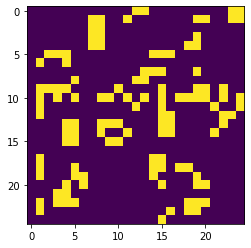

7


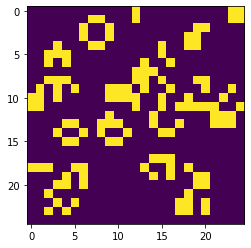

8


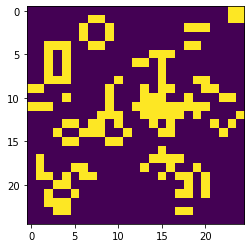

9


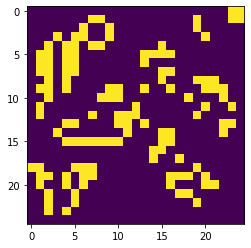

10


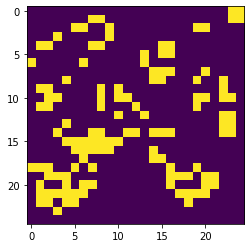

11


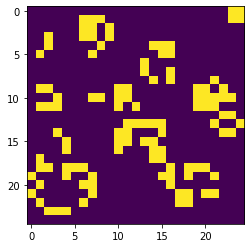

12


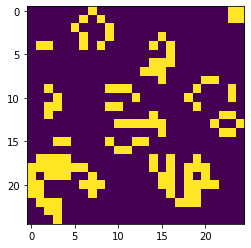

13


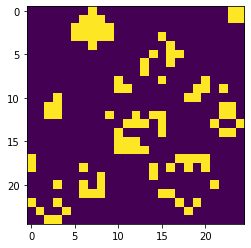

14


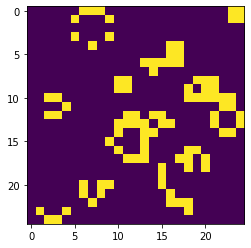

15


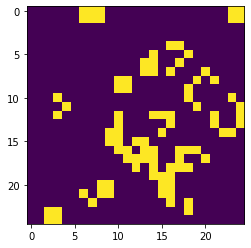

16


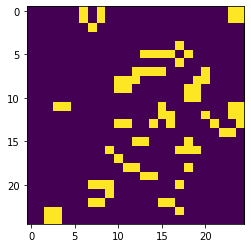

17


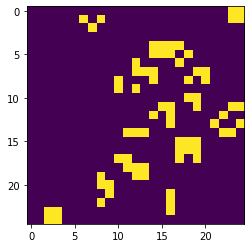

18


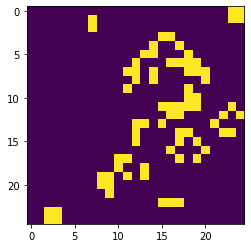

19


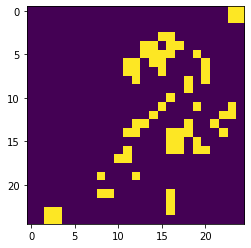

20


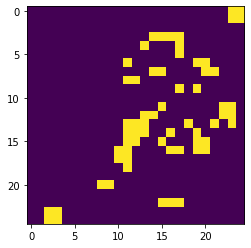

21


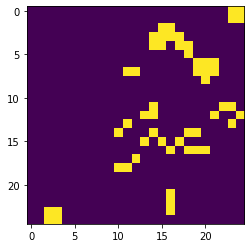

22


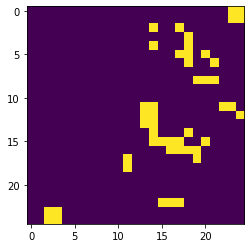

23


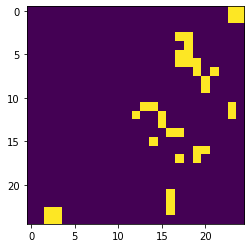

24


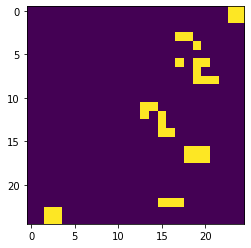

25


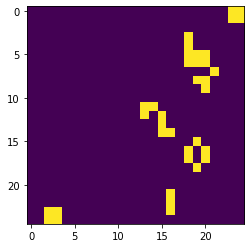

26


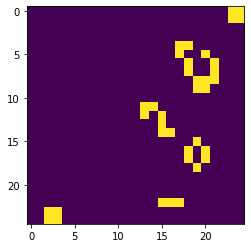

27


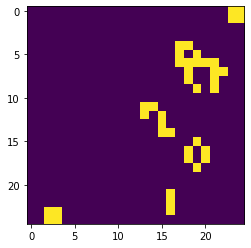

28


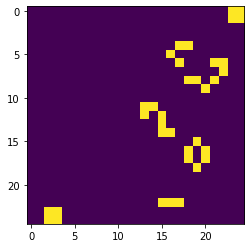

29


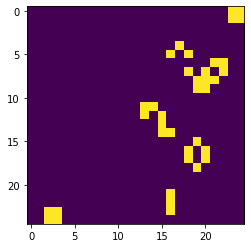

30


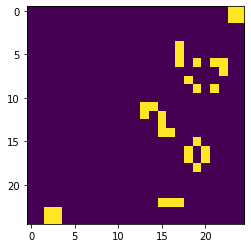

31


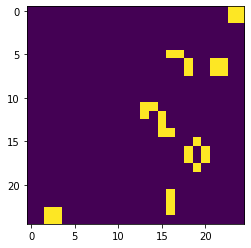

32


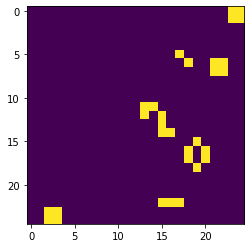

33


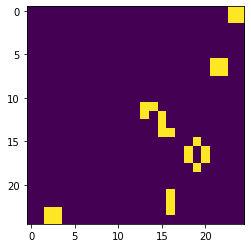

34


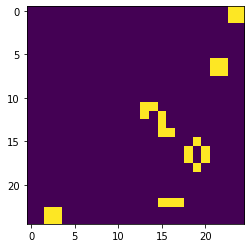

35


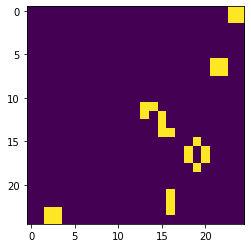

36


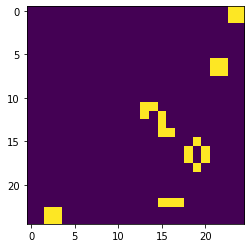

37


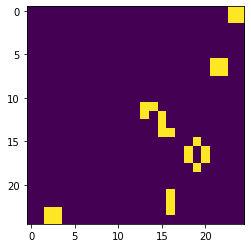

38


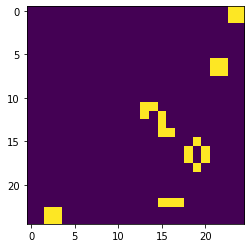

39


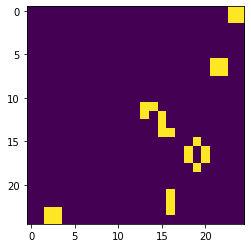

40


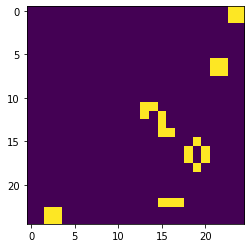

41


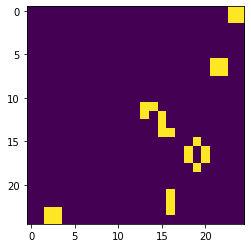

42


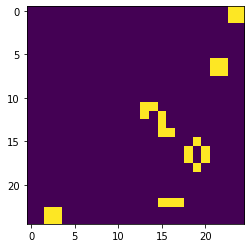

43


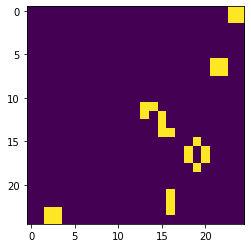

44


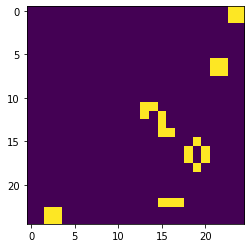

45


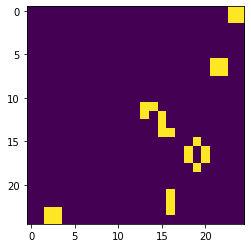

46


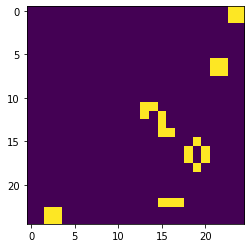

47


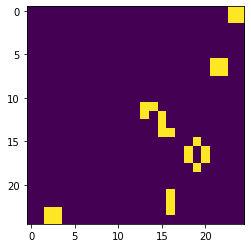

48


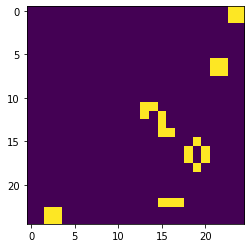

49


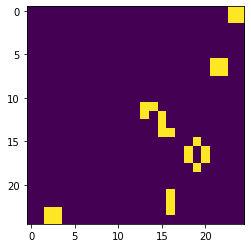

50


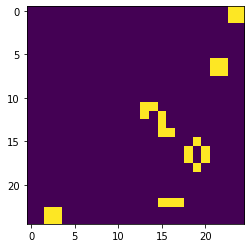

51


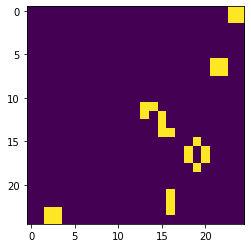

52


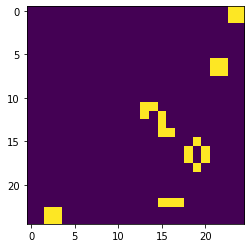

53


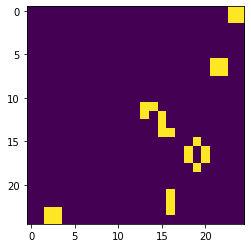

54


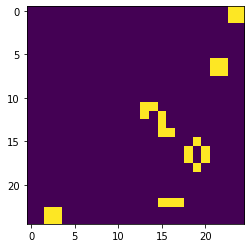

55


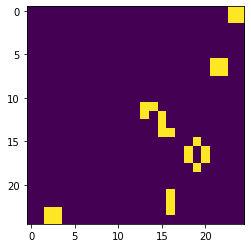

56


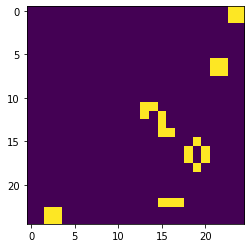

57


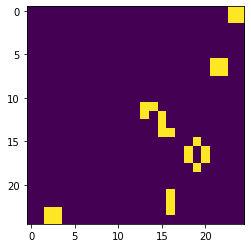

58


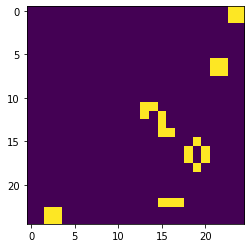

59


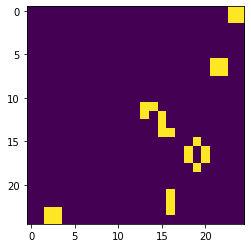

60


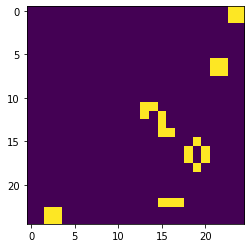

61


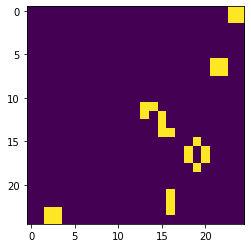

62


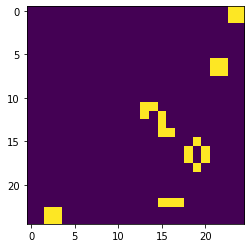

63


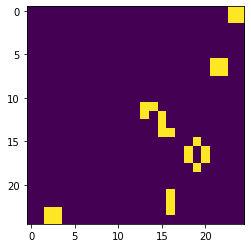

64


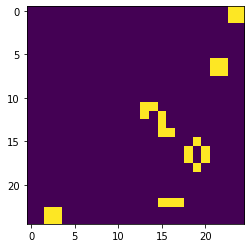

65


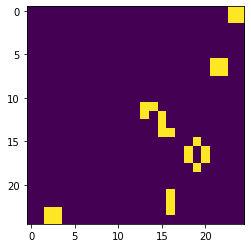

66


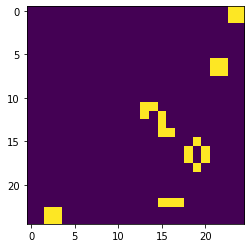

67


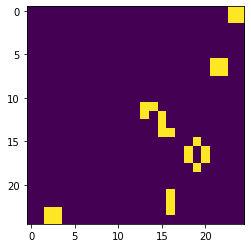

68


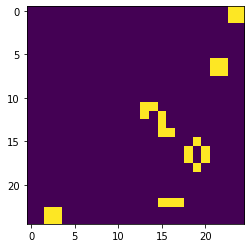

69


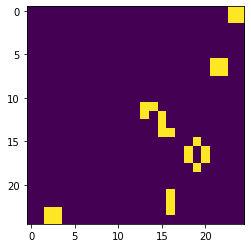

70


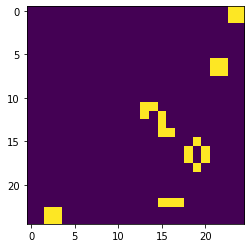

71


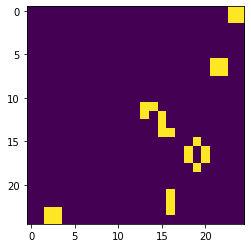

72


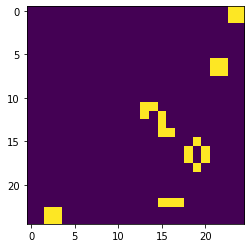

73


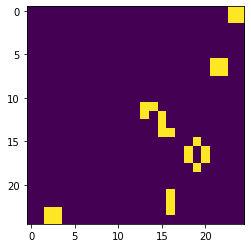

74


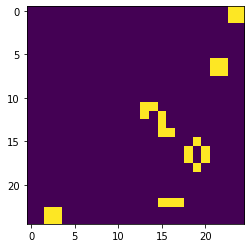

75


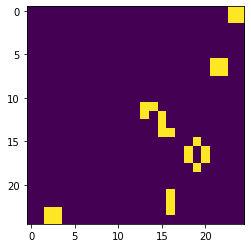

76


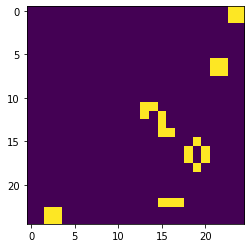

77


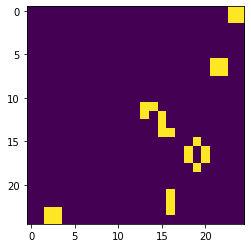

78


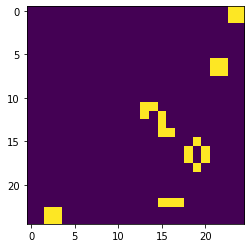

79


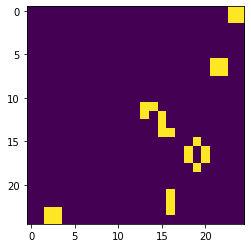

80


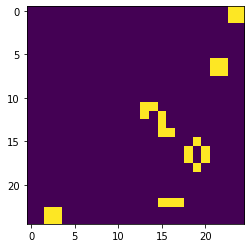

81


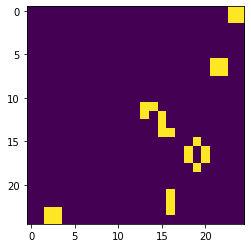

82


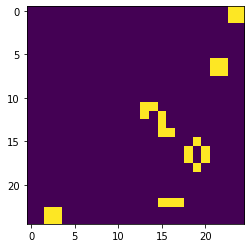

83


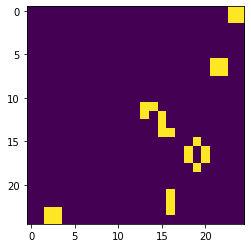

84


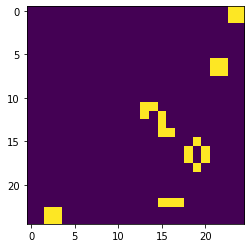

85


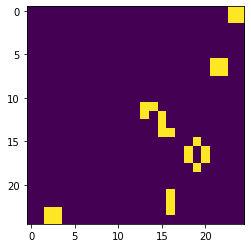

86


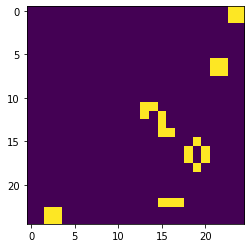

87


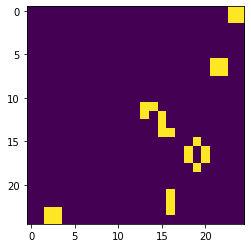

88


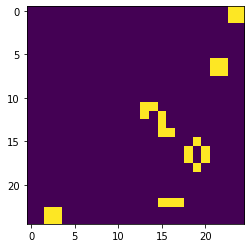

89


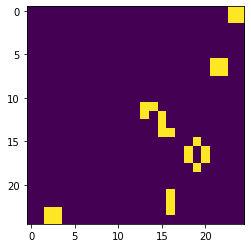

90


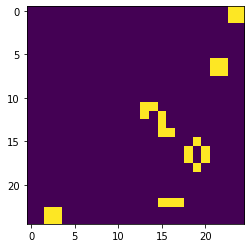

91


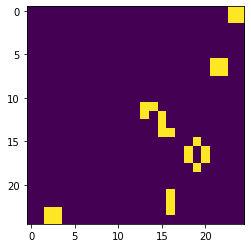

92


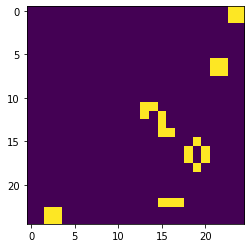

93


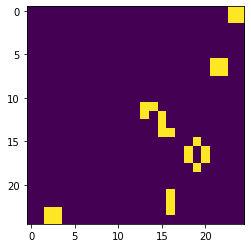

94


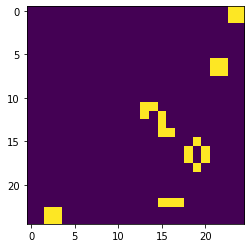

95


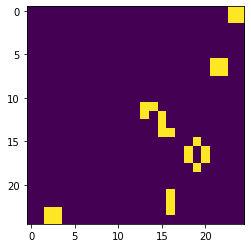

96


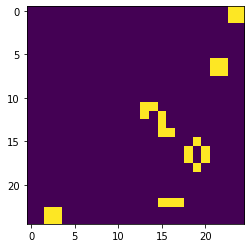

97


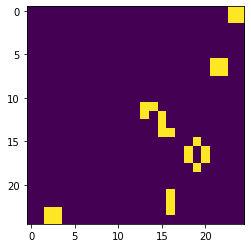

98


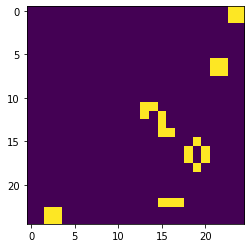

99


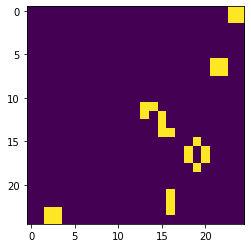

100


In [5]:
# allow user to specify grid size and number of iterations
rows = int(input("How many rows of cells? "))
cols = int(input("How many columns of cells? "))
itns = int(input("How many iterations? "))

filenames = []

grid = np.random.randint(2, size=(rows, cols)) # initialise grid with random initial config

for v in range(itns):
    grid_new = grid
    q = (rows,cols)
    score_grid = np.zeros(q)
    
    # os.makedirs("~/results", exist_ok=True)
    filename = f'{v}.png'
    filenames.append(filename)
    
    pyplot.figure()
    pyplot.imshow(grid)
    pyplot.savefig(filename)
    pyplot.show()
    pyplot.close()
    print(v+1)
    
    neighbors = lambda x, y : [(x2, y2) for x2 in range(x-1, x+2) # neighbours function accounting for boundaries
                                   for y2 in range(y-1, y+2)
                                   if (-1 < x <= rows and
                                       -1 < y <= cols and
                                       (x != x2 or y != y2) and
                                       (0 <= x2 <= rows-1) and
                                       (0 <= y2 <= cols-1))]

    for i in range(rows):
        for j in range(cols):
        
            score = 0
            for n in neighbors(i,j):
                val = grid[n]
                score += val
            score_grid[i,j] = score
        
    # print(score_grid)

    for i in range(rows):
        for j in range(cols):
            if grid[i,j] == 1:
                if score_grid[i,j] < 2:
                    grid_new[i,j] = 0
                elif score_grid[i,j] > 3:
                    grid_new[i,j] = 0
                else: 
                    grid_new[i,j] = grid[i,j]
            elif grid[i,j] == 0:
                if score_grid[i,j] == 3:
                    grid_new[i,j] = 1
                else:
                    grid_new[i,j] = grid[i,j]
    
    grid = grid_new
    
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
for filename in set(filenames):
    os.remove(filename)

# Stage 1 simulation of blinker or glider

How many rows of cells? 9
How many columns of cells? 9
How many iterations? 14


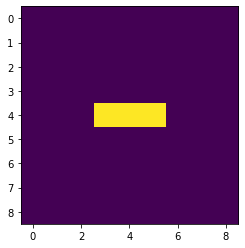

1


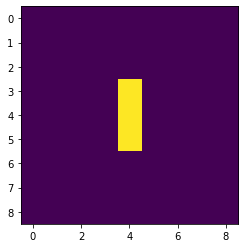

2


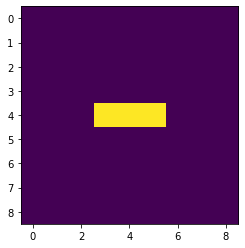

3


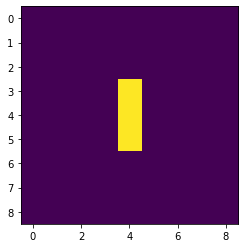

4


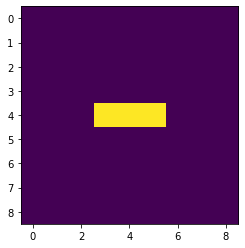

5


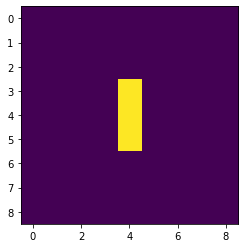

6


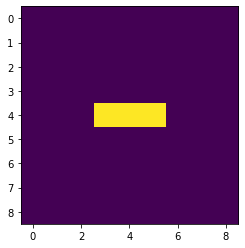

7


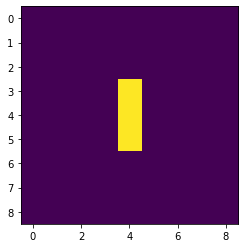

8


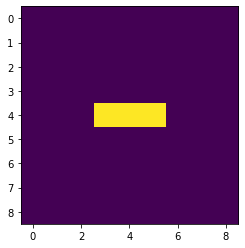

9


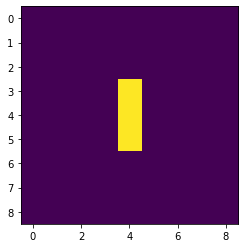

10


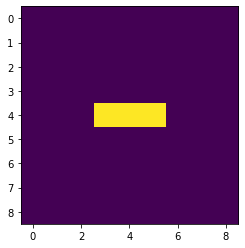

11


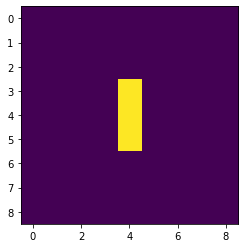

12


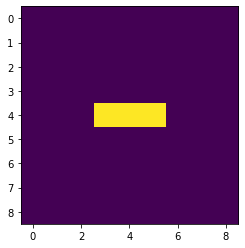

13


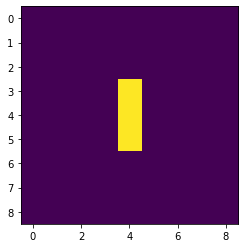

14


In [5]:
rows = int(input("How many rows of cells? "))
cols = int(input("How many columns of cells? "))
itns = int(input("How many iterations? "))

filenames = []

q = (rows,cols)

grid = np.zeros(q)

on_cells = [(4,3),(4,4),(4,5)] # initial config of blinker
# on_cells = [(2,0),(2,1),(2,2),(1,2),(0,1)] # initial config of glider

for c in on_cells:
    grid[c] = 1

for v in range(itns):
    grid_new = grid
    score_grid = np.zeros(q)
    
    # os.makedirs("~/results", exist_ok=True)
    filename = f'{v}.png'
    filenames.append(filename)
    
    pyplot.figure()
    pyplot.imshow(grid)
    pyplot.savefig(filename)
    pyplot.show()
    pyplot.close()
    print(v+1)
    
    neighbors = lambda x, y : [(x2, y2) for x2 in range(x-1, x+2)
                                   for y2 in range(y-1, y+2)
                                   if (-1 < x <= rows and
                                       -1 < y <= cols and
                                       (x != x2 or y != y2) and
                                       (0 <= x2 <= rows-1) and
                                       (0 <= y2 <= cols-1))]

    for i in range(rows):
        for j in range(cols):
        
            score = 0
            for n in neighbors(i,j):
                val = grid[n]
                score += val
            score_grid[i,j] = score
        
    # print(score_grid)

    for i in range(rows):
        for j in range(cols):
            if grid[i,j] == 1:
                if score_grid[i,j] < 2:
                    grid_new[i,j] = 0
                elif score_grid[i,j] > 3:
                    grid_new[i,j] = 0
                else: 
                    grid_new[i,j] = grid[i,j]
            elif grid[i,j] == 0:
                if score_grid[i,j] == 3:
                    grid_new[i,j] = 1
                else:
                    grid_new[i,j] = grid[i,j]
    
    grid = grid_new
    
with imageio.get_writer('mygif2.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
for filename in set(filenames):
    os.remove(filename)